In [6]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage
import collections

%matplotlib inline
%rehashx
pd.__version__

u'0.17.1'

In [7]:
def get_dict(x, y):
    a_dict = collections.OrderedDict()
    for valx, valy in zip(x, y):
        a_dict[valx] = valy
    
    return a_dict


OrderedDict([(2003, 3), (2004, 10), (2005, 8), (2006, 145), (2007, 377), (2008, 1042), (2009, 1496), (2010, 2056), (2011, 3541), (2012, 4685), (2013, 5815), (2014, 6150), (2015, 5607)])
OrderedDict([(2003, 3), (2004, 13), (2005, 21), (2006, 166), (2007, 543), (2008, 1585), (2009, 3081), (2010, 5137), (2011, 8678), (2012, 13363), (2013, 19178), (2014, 25328), (2015, 30935)])

OrderedDict([(2011, 10), (2012, 42), (2013, 78), (2014, 126), (2015, 75), (2016, 7)])
OrderedDict([(2011, 0.11523392486748099), (2012, 0.3891341764573823), (2013, 0.6778600479716341), (2014, 1.010739102969046), (2015, 1.0699854533699693)])


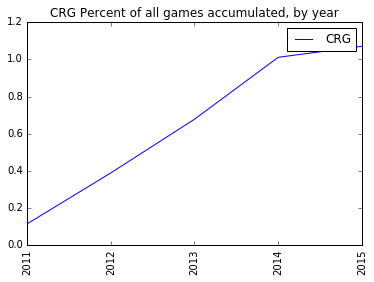

In [32]:
def plot_accumulated_percent(fts, person, label="Person"):
    accumulated = collections.OrderedDict()
    total = 0
    for key in person.keys():
        total += person[key]
        accumulated[key] = total

    fts_accumulated = collections.OrderedDict()
    total = 0
    for key in fts.keys():
        total += fts[key]
        fts_accumulated[key] = total

    percents_of_total = collections.OrderedDict()
    for key in accumulated.keys():
        if key in fts:
            percents_of_total[key] = (accumulated[key] / float(fts_accumulated[key])) * 100

    print fts
    print fts_accumulated
    print
    print person
    print percents_of_total
    
    plooot, = plt.plot(percents_of_total.keys(), percents_of_total.values(), label=label)
    
    plt.xticks(percents_of_total.keys(), percents_of_total.keys(), rotation='vertical')
    plt.title(label + " Percent of all games accumulated, by year")
    
    return plooot
    
crg_data = get_dict([2011, 2012, 2013, 2014, 2015, 2016], 
                   [10, 42, 78, 126, 75, 7])

rslt = plot_accumulated_percent(fts_data, crg_data, "CRG") 
plt.legend(handles=[rslt])
#plt.title("CRG Percent of all games accumulated, by year")    

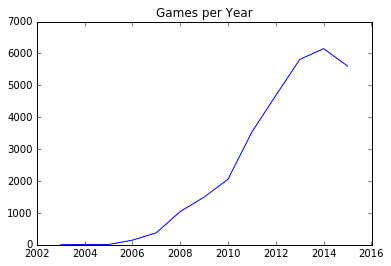

In [9]:
## start year = 2003
fts_data = get_dict([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], [3, 10, 8, 145, 377, 1042, 1496, 2056, 3541, 4685, 5815, 6150, 5607]
)
plt.plot(fts_data.keys(), fts_data.values())
plt.title("Games per Year")


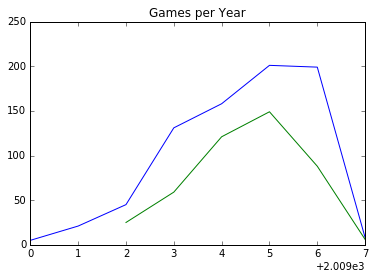

In [10]:
## start year = 2003

fts_data = get_dict([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], 
                    [3, 10, 8, 145, 377, 1042, 1496, 2056, 3541, 4685, 5815, 6150, 5607])


stabby_data = get_dict([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], 
                       [5, 21, 45, 131, 158, 201, 199, 8])
wb_data = get_dict([2011, 2012, 2013, 2014, 2015, 2016], 
                   [25, 59, 121, 149, 88, 6])


plt.plot(stabby_data.keys(), stabby_data.values())
plt.plot(wb_data.keys(), wb_data.values())
plt.title("Games per Year")


OrderedDict([(2003, 3), (2004, 10), (2005, 8), (2006, 145), (2007, 377), (2008, 1042), (2009, 1496), (2010, 2056), (2011, 3541), (2012, 4685), (2013, 5815), (2014, 6150), (2015, 5607)])
OrderedDict([(2003, 3), (2004, 13), (2005, 21), (2006, 166), (2007, 543), (2008, 1585), (2009, 3081), (2010, 5137), (2011, 8678), (2012, 13363), (2013, 19178), (2014, 25328), (2015, 30935)])

OrderedDict([(2011, 25), (2012, 59), (2013, 121), (2014, 149), (2015, 88), (2016, 6)])
OrderedDict([(2011, 0.28808481216870246), (2012, 0.6286013619696176), (2013, 1.0689331525706538), (2014, 1.397662665824384), (2015, 1.4288023274608048)])


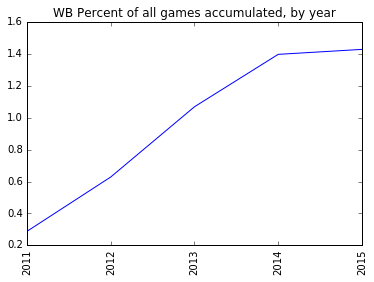

In [33]:
wb_data = get_dict([2011, 2012, 2013, 2014, 2015, 2016], 
                   [25, 59, 121, 149, 88, 6])
plot_accumulated_percent(fts_data, wb_data, "WB")    
#plt.title("WISHBONE Percent of all games accumulated, by year")

OrderedDict([(2003, 3), (2004, 10), (2005, 8), (2006, 145), (2007, 377), (2008, 1042), (2009, 1496), (2010, 2056), (2011, 3541), (2012, 4685), (2013, 5815), (2014, 6150), (2015, 5607)])
OrderedDict([(2003, 3), (2004, 13), (2005, 21), (2006, 166), (2007, 543), (2008, 1585), (2009, 3081), (2010, 5137), (2011, 8678), (2012, 13363), (2013, 19178), (2014, 25328), (2015, 30935)])

OrderedDict([(2009, 5), (2010, 21), (2011, 45), (2012, 131), (2013, 158), (2014, 201), (2015, 199), (2016, 8)])
OrderedDict([(2009, 0.16228497241155468), (2010, 0.5061319836480436), (2011, 0.818160866559115), (2012, 1.5116366085459851), (2013, 1.8771509020752948), (2014, 2.2149399873657614), (2015, 2.45676418296428)])


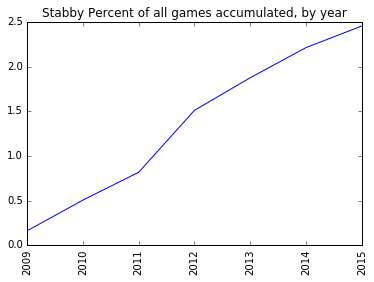

In [34]:
stabby_data = get_dict([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], 
                       [5, 21, 45, 131, 158, 201, 199, 8])
plot_accumulated_percent(fts_data, stabby_data, "Stabby") 
#plt.title("STABBY Percent of all games accumulated, by year")

OrderedDict([(2003, 3), (2004, 10), (2005, 8), (2006, 145), (2007, 377), (2008, 1042), (2009, 1496), (2010, 2056), (2011, 3541), (2012, 4685), (2013, 5815), (2014, 6150), (2015, 5607)])
OrderedDict([(2003, 3), (2004, 13), (2005, 21), (2006, 166), (2007, 543), (2008, 1585), (2009, 3081), (2010, 5137), (2011, 8678), (2012, 13363), (2013, 19178), (2014, 25328), (2015, 30935)])

OrderedDict([(2011, 10), (2012, 42), (2013, 78), (2014, 126), (2015, 107), (2016, 7)])
OrderedDict([(2011, 0.11523392486748099), (2012, 0.3891341764573823), (2013, 0.6778600479716341), (2014, 1.010739102969046), (2015, 1.1734281558105706)])


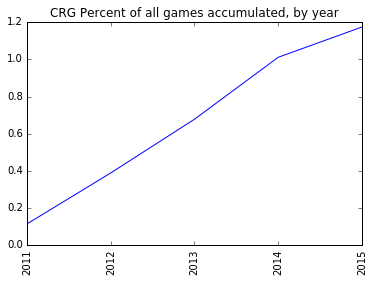

In [42]:


crg_data = get_dict([2011, 2012, 2013, 2014, 2015, 2016], 
                   [10, 42, 78, 126, 107, 7])



plot_accumulated_percent(fts_data, crg_data, "CRG") 
#plt.title("CRG Percent of all games accumulated, by year")

OrderedDict([(2003, 3), (2004, 10), (2005, 8), (2006, 145), (2007, 377), (2008, 1042), (2009, 1496), (2010, 2056), (2011, 3541), (2012, 4685), (2013, 5815), (2014, 6150), (2015, 5607)])
OrderedDict([(2003, 3), (2004, 13), (2005, 21), (2006, 166), (2007, 543), (2008, 1585), (2009, 3081), (2010, 5137), (2011, 8678), (2012, 13363), (2013, 19178), (2014, 25328), (2015, 30935)])

OrderedDict([(2012, 43), (2013, 97), (2014, 116), (2015, 132), (2016, 4)])
OrderedDict([(2012, 0.32178403053206617), (2013, 0.7300031285848367), (2014, 1.010739102969046), (2015, 1.2542427670922902)])


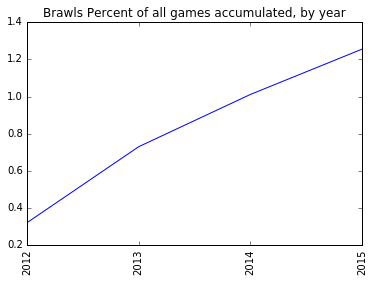

In [37]:
brawls_data = get_dict([2012, 2013, 2014, 2015, 2016], 
                   [43, 97, 116, 132, 4])

plot_accumulated_percent(fts_data, brawls_data, "Brawls") 
#plt.title("Brawls Percent of all games accumulated, by year")

OrderedDict([(2003, 3), (2004, 10), (2005, 8), (2006, 145), (2007, 377), (2008, 1042), (2009, 1496), (2010, 2056), (2011, 3541), (2012, 4685), (2013, 5815), (2014, 6150), (2015, 5607)])
OrderedDict([(2003, 3), (2004, 13), (2005, 21), (2006, 166), (2007, 543), (2008, 1585), (2009, 3081), (2010, 5137), (2011, 8678), (2012, 13363), (2013, 19178), (2014, 25328), (2015, 30935)])

OrderedDict([(2011, 25), (2012, 59), (2013, 121), (2014, 149), (2015, 88), (2016, 6)])
OrderedDict([(2011, 0.28808481216870246), (2012, 0.6286013619696176), (2013, 1.0689331525706538), (2014, 1.397662665824384), (2015, 1.4288023274608048)])
OrderedDict([(2003, 3), (2004, 10), (2005, 8), (2006, 145), (2007, 377), (2008, 1042), (2009, 1496), (2010, 2056), (2011, 3541), (2012, 4685), (2013, 5815), (2014, 6150), (2015, 5607)])
OrderedDict([(2003, 3), (2004, 13), (2005, 21), (2006, 166), (2007, 543), (2008, 1585), (2009, 3081), (2010, 5137), (2011, 8678), (2012, 13363), (2013, 19178), (2014, 25328), (2015, 30935)])

Ord

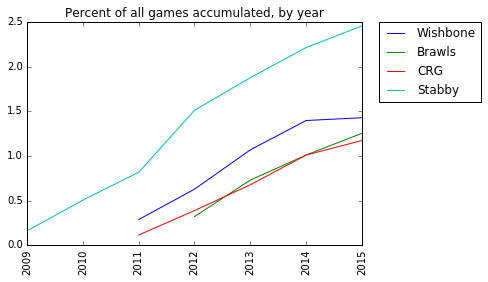

In [43]:
handlers = []

handlers.append(plot_accumulated_percent(fts_data, wb_data, "Wishbone"))    
handlers.append(plot_accumulated_percent(fts_data, brawls_data, "Brawls"))
handlers.append(plot_accumulated_percent(fts_data, crg_data, "CRG"))
handlers.append(plot_accumulated_percent(fts_data, stabby_data, "Stabby")) 
#plt.legend(handles=handlers)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handlers)

#plt.plot(stabby_percents_of_total.keys(), stabby_percents_of_total.values())
#plt.plot(wb_percents_of_total.keys(), wb_percents_of_total.values())
plt.title("Percent of all games accumulated, by year")